#Headers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import rotate, gaussian_filter
from scipy.signal import convolve2d


# Ejemplo función cuadrática

In [2]:
def fs_qadratic_wave(x, n):
    s = 0.5
    for i in range(1, n+1, 2):
        s += (2/(i * np.pi) ) * np.sin(i * x)

    return s

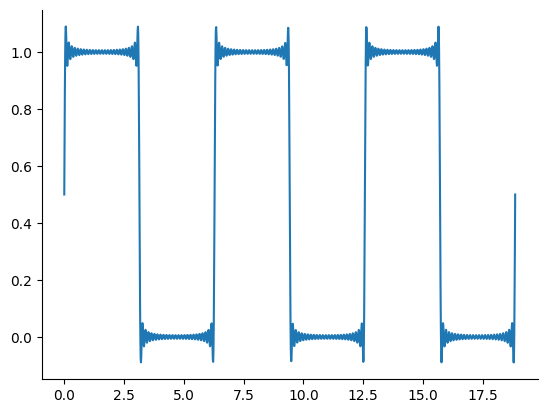

In [3]:
# prompt: plot fs_qadratic_wave function from 0 to 2pi

x = np.linspace(0, 6 * np.pi, 1500)
y = fs_qadratic_wave(x, 50)

fig, ax = plt.subplots()

ax.plot(x, y)
#plt.title("fs_qadratic_wave Function Plot")
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


#Ejemplo Discreto

In [4]:
v = np.array([1, 2, 2, 1, 2, 2, 1])
N = len(v)
X_k = np.zeros(N, dtype=complex)

# Iteramos sobre cada frecuencia k
for k in range(N):
    # Iteramos sobre cada muestra en el tiempo
    for n in range(N):
        exponent = -2j * np.pi * k * n / N
        X_k[k] += v[n] * np.exp(exponent)

for k in range(N):
    print(f"X[{k}] = {X_k[k]:.4f}")

X[0] = 11.0000+0.0000j
X[1] = -0.7225-0.3479j
X[2] = -1.4010-1.7568j
X[3] = 0.1235+0.5410j
X[4] = 0.1235-0.5410j
X[5] = -1.4010+1.7568j
X[6] = -0.7225+0.3479j


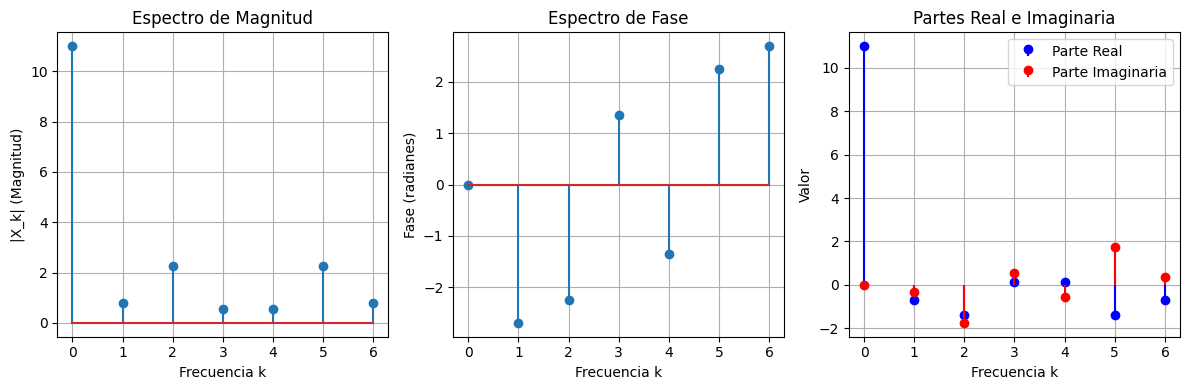

In [5]:
k = np.arange(N)

# Magnitud |X_k|
magnitude = np.abs(X_k)

# Fase arg(X_k)
phase = np.angle(X_k)

# Parte real e imaginaria
real_part = X_k.real
imag_part = X_k.imag

# --- Gráficos ---
plt.figure(figsize=(12, 4))

# 1. Magnitud de la DFT
plt.subplot(1, 3, 1)
plt.stem(k, magnitude)
plt.xlabel("Frecuencia k")
plt.ylabel("|X_k| (Magnitud)")
plt.title("Espectro de Magnitud")
plt.grid()

# 2. Fase de la DFT
plt.subplot(1, 3, 2)
plt.stem(k, phase)
plt.xlabel("Frecuencia k")
plt.ylabel("Fase (radianes)")
plt.title("Espectro de Fase")
plt.grid()

# 3. Parte real e imaginaria
plt.subplot(1, 3, 3)
plt.stem(k, real_part, linefmt='b-', markerfmt='bo', basefmt=" ", label="Parte Real")
plt.stem(k, imag_part, linefmt='r-', markerfmt='ro', basefmt=" ", label="Parte Imaginaria")
plt.xlabel("Frecuencia k")
plt.ylabel("Valor")
plt.title("Partes Real e Imaginaria")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

-----------------------------------------------------------
1️⃣ Análisis del coeficiente X[0] = 11.0000 + 0.0000j  
-----------------------------------------------------------
Es la componente DC o el promedio de la señal.  
Su valor es grande (11.0), indicando una fuerte componente de baja frecuencia.  
No tiene parte imaginaria, lo que significa que no hay fase en la componente de frecuencia 0.  

La señal tiene un componente constante significativo, lo que sugiere que su valor medio es alto.

El coeficiente **X[0]** en la Transformada de Fourier Discreta (DFT) representa la **suma de todos los valores de la señal**, no su promedio.

**Cálculo de X[0]:**
Dado el vector:  
v = [1, 2, 2, 1, 2, 2, 1]  
La suma de sus valores es:  
X[0] = 1 + 2 + 2 + 1 + 2 + 2 + 1 = **11**  

**¿Cómo obtener el promedio real?**
El promedio de la señal se calcula dividiendo **X[0] entre el número de muestras N**:  

$\text{Promedio} = \frac{X[0]}{N} = \frac{11}{7} \approx 1.57$

Este es el valor medio real de la señal en el dominio del tiempo.



-----------------------------------------------------------
2️⃣ Análisis de las frecuencias bajas: X[1] = -0.7225 - 0.3479j y X[6] = -0.7225 + 0.3479j  
-----------------------------------------------------------
Estas son las frecuencias más cercanas a la componente DC.  
Tienen una magnitud pequeña, lo que indica poca energía en bajas frecuencias.  
Son complejos conjugados, lo que confirma que la señal original es real y simétrica.  

La señal tiene muy poca contribución en frecuencias bajas, por lo que no tiene grandes variaciones lentas.

-----------------------------------------------------------
3️⃣ Análisis de las frecuencias medias: X[2] = -1.4010 - 1.7568j y X[5] = -1.4010 + 1.7568j  
-----------------------------------------------------------
Estas frecuencias tienen más energía que las bajas.  
Su magnitud es mayor que la de X[1] y X[6], indicando que las variaciones moderadas en la señal tienen más importancia.  
Son complejos conjugados, confirmando que la señal es real.  

La señal tiene más contenido de frecuencia en el rango medio, lo que sugiere que hay variaciones significativas pero no extremas.

-----------------------------------------------------------
4️⃣ Análisis de las frecuencias altas: X[3] = 0.1235 + 0.5410j y X[4] = 0.1235 - 0.5410j  
-----------------------------------------------------------
Estas son las frecuencias más altas en la DFT.  
Sus magnitudes son pequeñas, indicando que hay poca contribución de altas frecuencias en la señal.  
Si estos valores fueran grandes, significaría que la señal tiene muchas oscilaciones rápidas.  

La señal no tiene muchas variaciones rápidas, lo que sugiere que es suave y sin cambios bruscos.

-----------------------------------------------------------
**Resumen General**

✅ La señal tiene un valor medio alto (gran coeficiente X[0]).  
✅ Las bajas frecuencias están poco representadas (X[1] y X[6] son pequeños).  
✅ Las frecuencias medias dominan la señal (X[2] y X[5] son más grandes).  
✅ Las altas frecuencias tienen poca energía (X[3] y X[4] son pequeños).  



- La señal original no tiene variaciones bruscas.  
- No presenta oscilaciones rápidas.  
- Es probable que la señal sea suave y con una estructura repetitiva.  


# Transformada en imágenes
FFT es la versión rápida $O(nlogn)$  de la DFT O(n^2). Porpuesto por Cooley-Tukey, este algoritmo utiliza divide y vencerás para realizar el cálculo de los coeficientes. En los ejemplos utilizaremos este algoritmo.

```
Tarea:

Explicar el algoritmo FFT en diapositivas para la siguiente clase, grupos de tres personas.

```







# Transformada en imágenes

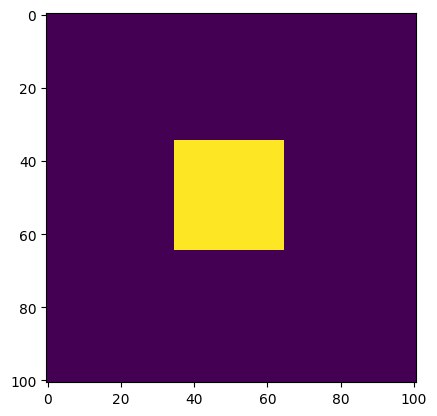

In [6]:
mat = np.zeros((101,101), dtype='int')
mat[35:65,35:65] = 1
plt.imshow(mat)
plt.show()

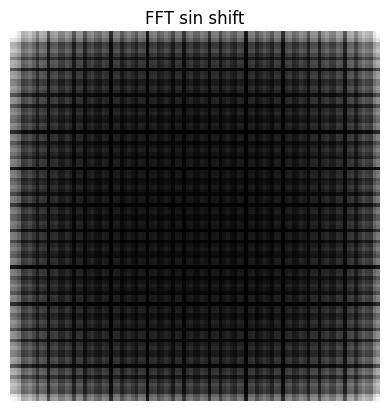

In [7]:
fft                 = np.fft.fft2(mat)
espectro_sin_shift  = np.log1p(np.abs(fft))

plt.imshow(espectro_sin_shift, cmap='gray')
plt.title("FFT sin shift")
plt.axis("off")
plt.show()


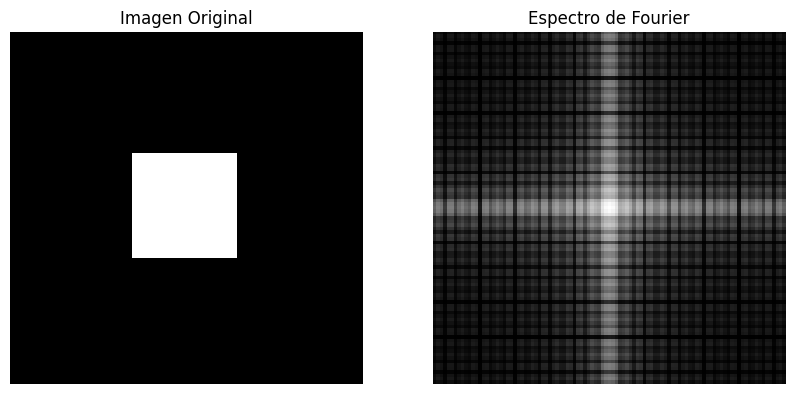

In [8]:
img_f           = np.fft.fft2(mat)
fft_centrada    = np.fft.fftshift(img_f)
espectro_magnitud = np.log1p(np.abs(fft_centrada))

plt.figure(figsize=(10,5))

# Imagen original
plt.subplot(1,2,1)
plt.imshow(mat, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

# Espectro de Fourier
plt.subplot(1,2,2)
plt.imshow(espectro_magnitud, cmap='gray')
plt.title("Espectro de Fourier")
plt.axis("off")

plt.show()

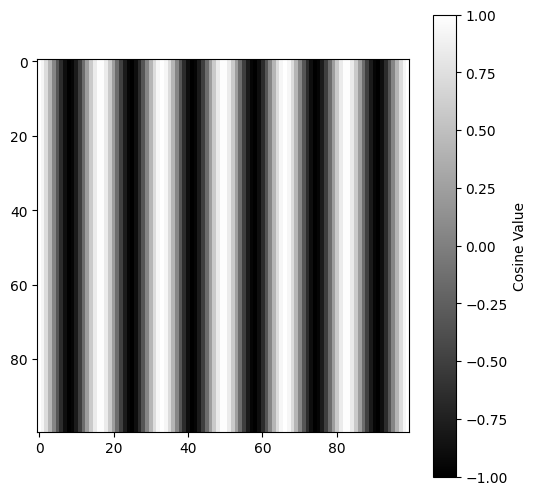

In [9]:
size = 100
matrix = np.zeros((size, size))

for i in range(size):
    row = np.cos(3*np.linspace(0, 4 * np.pi, size))
    matrix[i, :] = row

plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap='gray', vmin=-1, vmax=1)
plt.colorbar(label='Cosine Value')
plt.show()
plt.imsave('cosine.png', matrix, cmap='gray')


In [10]:
def show_fft(mat, name):
    img_f           = np.fft.fft2(mat)
    fft_centrada    = np.fft.fftshift(img_f)
    espectro_magnitud = np.log1p(np.abs(fft_centrada))

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(mat, cmap='gray')
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(espectro_magnitud, cmap='gray')
    plt.axis("off")
    plt.savefig(name)
    plt.show()



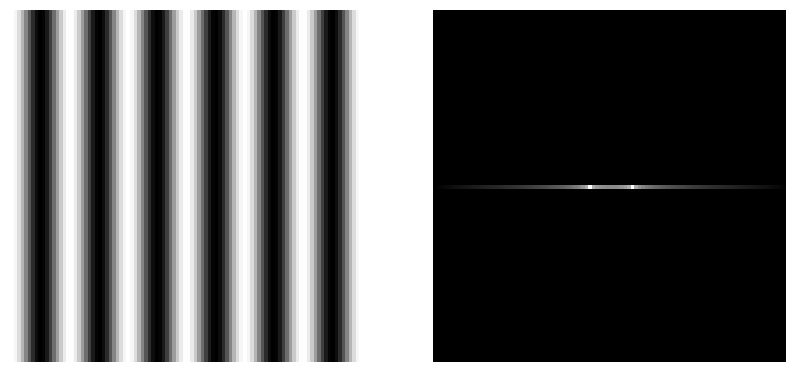

In [11]:
show_fft(matrix, "mat_h.png")


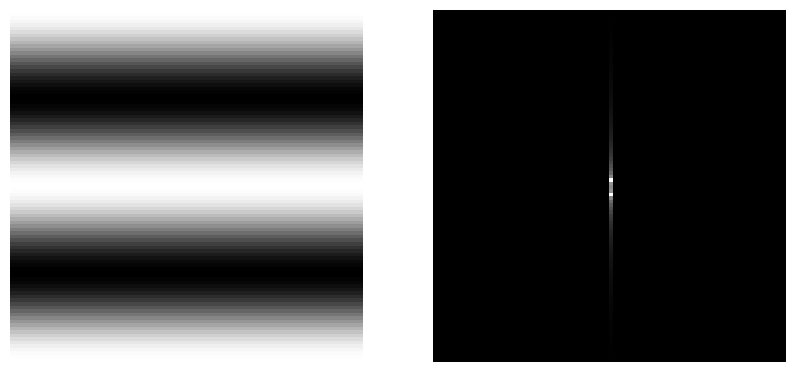

In [12]:
size = 100
matrix_v = np.zeros((size, size))

for i in range(size):
    row = np.cos(1*np.linspace(0, 4 * np.pi, size))
    matrix_v[i, :] = row

matrix_v = matrix_v.T
show_fft(matrix_v, "mat_v.png")

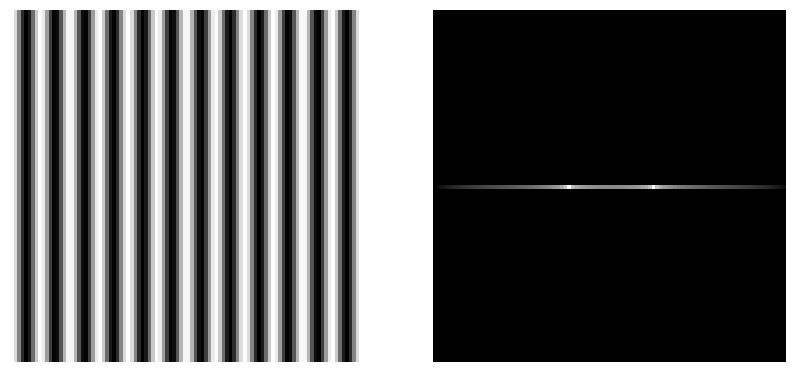

In [13]:
size = 100
matrix_s = np.zeros((size, size))

for i in range(size):
    row = np.cos(6*np.linspace(0, 4 * np.pi, size))
    matrix_s[i, :] = row

#matrix_s = matrix_s.T
show_fft(matrix_s, "mat_h.png")

## Nota

El valor del centro del espectro corresponde al valor $0$ es decir a la media de los valores.

\begin{equation}
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) e^{-j 2\pi (ux + vy)} \,dx\,dy
\end{equation}

Nota que en la posición $x=0$, $y=0$ el valor de la exp. es 0 por ende todo se hace 1, luego en esa posición va la suma de los valores de la función

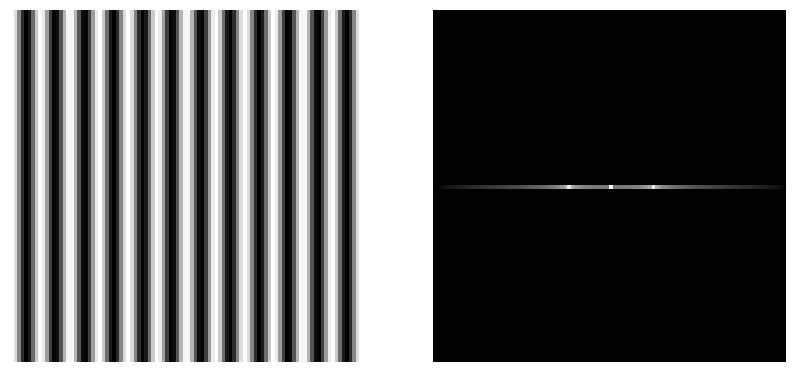

In [14]:
matrix_s = (matrix_s - np.min(matrix_s)) / (np.max(matrix_s) - np.min(matrix_s))
show_fft(matrix_s, "mat_s.png")

Al normalizar los valores ya no se anulan por eso aparece ese punto blanco más definido

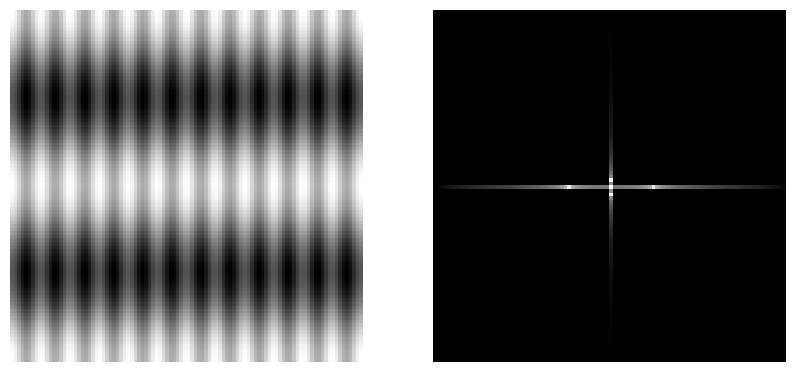

In [15]:
show_fft(matrix_s+matrix_v, "mat_prod.png")


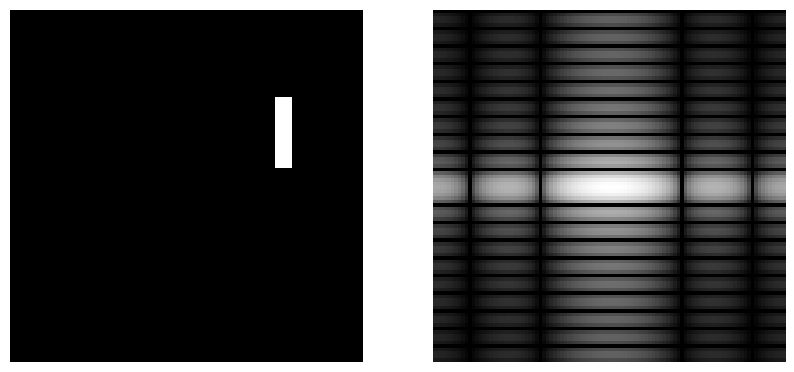

In [16]:
im = np.zeros((100,100))
im[25:45,75:80] = 1
show_fft(im, "im.png")

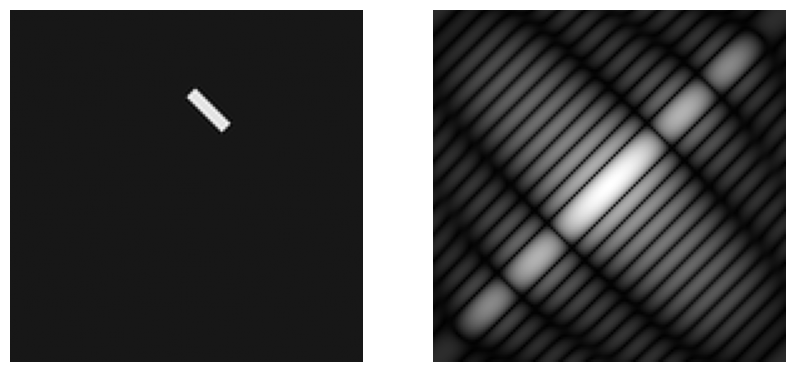

In [17]:
rotated_image = rotate(im, 45, reshape=True)
show_fft(rotated_image, "rotated_image.png")

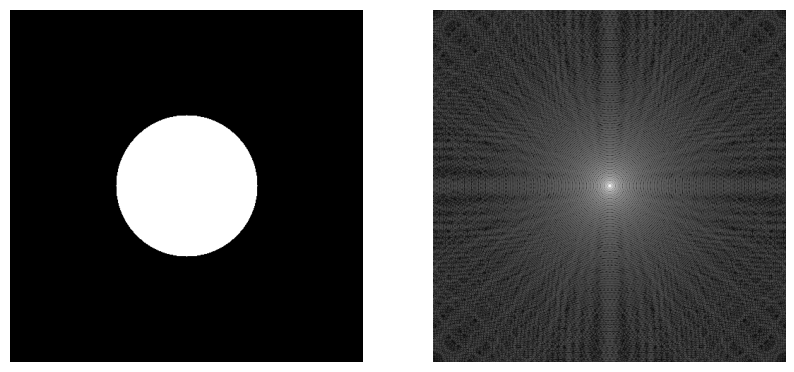

In [18]:
size = 500

matrix = np.zeros((size, size), dtype=int)

center_x = size // 2
center_y = size // 2

radius = 100

x, y = np.meshgrid(np.arange(size), np.arange(size))
circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2

matrix[circle] = 1

show_fft(matrix, "circle_fft.png")

In [19]:
img = np.array(Image.open("/content/goofy.jpg").convert("L"))  # Convert to grayscale
show_fft(img, "goofy.png")



FileNotFoundError: [Errno 2] No such file or directory: '/content/goofy.jpg'

In [ ]:
filtered_img = gaussian_filter(img, sigma=2) # sigma controls the amount of blurring

show_fft(filtered_img, "goofy_filtered.png")

In [ ]:
# Create a matrix for the letter 'a'
# a = np.zeros((100, 100))
# a[20:80, 30:70] = 1  # Adjust coordinates as needed
# a[25:50, 35:65] = 0
# a[55:80, 35:65] = 0
# show_fft(a, "letter_a.png")

# # Create a matrix for the letter 'b'
# b = np.zeros((100, 100))
# b[20:80, 30:70] = 1 # Adjust coordinates as needed
# b[25:47, 35:65] = 0
# b[52:75, 35:65] = 0

# b[20, 69]       = 0
# b[79, 69]       = 0
# b[49, 69]       = 0
# show_fft(b, "letter_b.png")

# # Create a matrix for the letter 'c'
c = np.zeros((100, 100))
c[20:80, 30:70] = 1 # Adjust coordinates as needed
c[25:75, 35:70] = 0
show_fft(c, "letter_c.png")


# Filtrando en el FD

In [ ]:
img = np.array(Image.open("/content/goofy.jpg").convert("L"))
show_fft(img, "goofy.jpg")

img_f       = np.fft.fft2(img)
f_shift     = np.fft.fftshift(img_f)
spectrum    = np.log1p(np.abs(f_shift))


rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
rad = 30


mask = np.zeros((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask = (x - ccol)**2 + (y - crow)**2 <= rad**2
plt.imshow(mask, cmap='gray')
plt.title("Máscara"), plt.xticks([]), plt.yticks([])
plt.show()


f_shift_filtered    = f_shift * mask
spectrum_mask       = np.log1p(np.abs(f_shift_filtered))

f_ishift = np.fft.ifftshift(f_shift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img_back, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(spectrum_mask, cmap='gray')
plt.savefig("goofy_filtered_ideal.png")
plt.show()


Recordar bajas frecuencias al centro, altas frecuencias en la parte exterior

# Práctica de Evaluación continua

# Teorema de la convolución 2D


In [ ]:
image = np.zeros((100, 100))
image[25:75, 25:75] = 1
filter_kernel = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])

convolved_image_spatial = convolve2d(image, filter_kernel, mode='same', boundary='fill', fillvalue=0)

fft_image = np.fft.fft2(image)
fft_filter = np.fft.fft2(filter_kernel, s=image.shape)
fft_convolved = fft_image * fft_filter

convolved_image_frequency = np.fft.ifft2(fft_convolved).real

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(convolved_image_spatial, cmap='gray')
plt.title('Convolución en el Dominio Espacial')


plt.subplot(1, 3, 3)
plt.imshow(convolved_image_frequency, cmap='gray')
plt.title('Convolución en el Dominio de la Frecuencia')

plt.show()

difference = convolved_image_spatial - convolved_image_frequency
print(f"Diferencia máxima entre las dos convoluciones: {np.max(np.abs(difference))}")




```
Codificar el filtro de Butterworth y Gaussiano y mostrar resultados

Mostrar cada filtro en 3 dimensiones

Descubra que ocurre al cambiar los valores de n (Butter), de sigma y d (Gauss)

Puede ser otra imagen, o la misma  pero pasar filtro pasa altas en ambos casos

Calcule la diferencia en hacer convolución 2D en el dominio de la frecuencia y en el espacial (use imágenes grandes tamaños de filtro grandes)

Explique que es aliasing y como se puede resolver
```

